In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.plots as plots
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db

In [2]:
# hack to get the path right
import sys
sys.path.append('..')

from ztf_maf.slicers import HealpixZTFSlicer
from ztf_maf.plots import ZTFBaseSkyMap

In [3]:
slicer = HealpixZTFSlicer(nside=64, lonCol='fieldRA', latCol='fieldDec')

# if we have no field overlaps (single pointing grid), a FieldSlicer will be faster
#slicer = slicers.OpsimFieldSlicer()
# modify to use ZTF field shapes
#slicer.plotFuncs = [ZTFBaseSkyMap, plots.OpsimHistogram]

metricList = []

m1 = metrics.IntraNightGapsMetric()
metricList.append(m1)
m2 = metrics.InterNightGapsMetric()
metricList.append(m2)
m3 = metrics.CountMetric(col='fieldRA')
metricList.append(m3)

filters = ['r','g']
programs = [1,2,3]

summaryMetrics = [metrics.MinMetric(), metrics.MeanMetric(), metrics.MaxMetric(), 
                  metrics.MedianMetric(), metrics.RmsMetric(), 
                 metrics.PercentileMetric(percentile=25), metrics.PercentileMetric(percentile=75)]

   
bDict={}
for i,metric in enumerate(metricList):

#    for j, filt in enumerate(filters):
#        sqlconstraint = "filter = '%s'"%(filt)
     for j, prog in enumerate(programs):
         sqlconstraint = "propID = '%s'"%(prog)
    
#    sqlconstraint=""
         bDict[sqlconstraint+metric.name] = metricBundles.MetricBundle(metric, slicer, sqlconstraint, 
                                              summaryMetrics=summaryMetrics,plotDict={'radius': np.radians(3.689)})

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database with constraint propID = '3'
Found 35256 visits
Running:  ["propID = '3'Count fieldRA", "propID = '3'Median Intra-Night Gap", "propID = '3'Median Inter-Night Gap"]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint propID = '1'
Found 70593 visits
Running:  ["propID = '1'Median Inter-Night Gap", "propID = '1'Median Intra-Night Gap", "propID = '1'Count fieldRA"]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint propID = '2'
Found 69005 visits
Running:  ["propID = '2'Median Inter-Night Gap", "propID = '2'Median Intra-Night Gap", "propID = '2'Count fieldRA"]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with propID = '3' sqlconstraint now.


/smallfiles/ebellm/anaconda/envs/maf/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


Plotting complete.
Plotting figures with propID = '1' sqlconstraint now.
Plotting complete.
Plotting figures with propID = '2' sqlconstraint now.
Plotting complete.


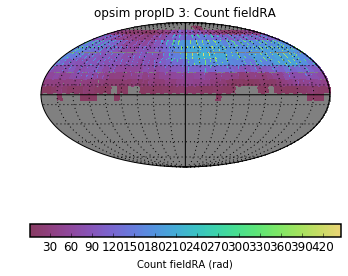

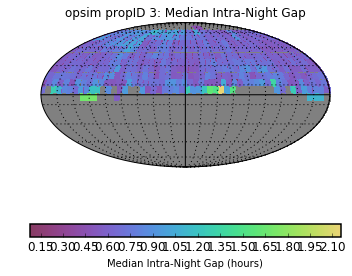

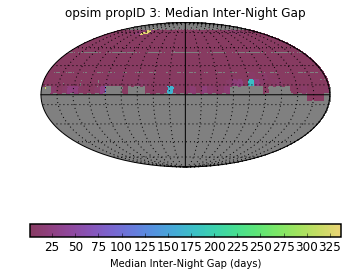

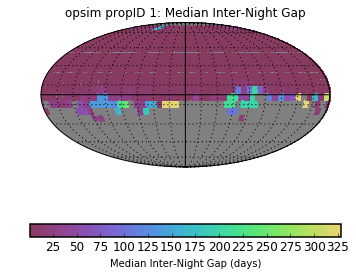

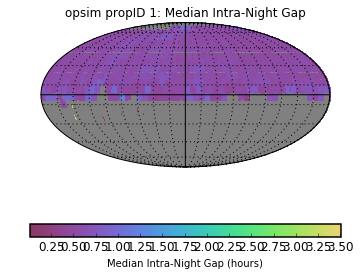

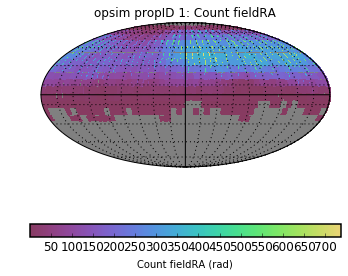

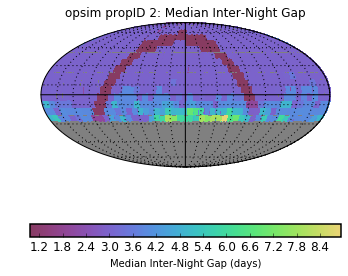

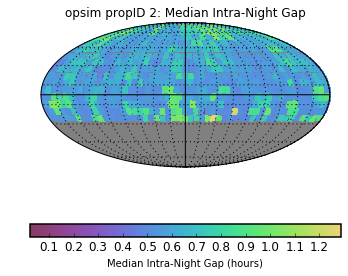

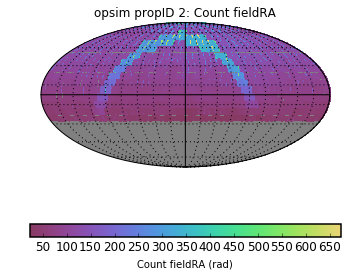

In [5]:
outDir = 'ZTF_test'
ztfDB = db.OpsimDatabase('../sims/test_schedule_v3.db',
                        defaultdbTables={'Summary':['Summary','obsHistID']})
ztfDB.raColName = 'fieldRA'
ztfDB.decColName = 'fieldDec'

resultsDb = db.ResultsDb(outDir=outDir)

bgroup = metricBundles.MetricBundleGroup(bDict, ztfDB, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [6]:
for key in sorted(bDict):
    bDict[key].computeSummaryStats(resultsDb=resultsDb)
    print key, bDict[key].summaryValues

propID = '1'Count fieldRA {'25th%ile': 9.0, 'Rms': 130.67620578236253, '75th%ile': 221.0, 'Min': 1.0, 'Max': 737.0, 'Median': 112.0, 'Mean': 131.80055322396032}
propID = '1'Median Inter-Night Gap {'25th%ile': 0.93927360610541655, 'Rms': 53.192447442181376, '75th%ile': 5.8710927891297615, 'Min': 0.87859658572051558, 'Max': 328.17065639542852, 'Median': 0.98205279029207304, 'Mean': 18.612913719815332}
propID = '1'Median Intra-Night Gap {'25th%ile': 0.54244101973017678, 'Rms': 0.12403975647992641, '75th%ile': 0.62315604271134362, 'Min': 0.011222787550650537, 'Max': 3.5069923967239447, 'Median': 0.57670249789953232, 'Mean': 0.59155062467054531}
propID = '2'Count fieldRA {'25th%ile': 71.0, 'Rms': 74.604393297603934, '75th%ile': 126.0, 'Min': 23.0, 'Max': 673.0, 'Median': 102.0, 'Mean': 115.01520188673884}
propID = '2'Median Inter-Night Gap {'25th%ile': 2.9937141575319401, 'Rms': 1.0631938735895399, '75th%ile': 3.0792541495975456, 'Min': 0.95850324071216164, 'Max': 8.9323540724508348, 'Media